In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [13]:
df = pd.read_csv("loan_approval_encoded.csv")#Read encoded data


X = df.drop(columns=['loan_status', 'loan_id'])  # Drop target and ID
y = df['loan_status']  # Target variable

#split into train sets and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
#Train XgBoost Model
from xgboost import XGBClassifier
#Supervised Learning
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)


C:\Users\nmegh\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:55:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [15]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)


In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#evaluated the model's performance using accuracy, classification report, and confusion matrix.
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       323
           1       0.98      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
[[314   9]
 [  6 525]]


In [20]:
from sklearn.metrics import confusion_matrix

# Step 1: Make predictions on the test data
y_pred = xgb_model.predict(X_test)  # X_test is your test features

# Step 2: Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # y_test is the actual labels

# Step 3: Print and interpret the confusion matrix
print("Confusion Matrix:")
print(cm)

# Extract values from the confusion matrix for easier understanding
TN, FP, FN, TP = cm.ravel()

# Printing out the individual values
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")


Confusion Matrix:
[[314   9]
 [  6 525]]
True Negatives (TN): 314
False Positives (FP): 9
False Negatives (FN): 6
True Positives (TP): 525


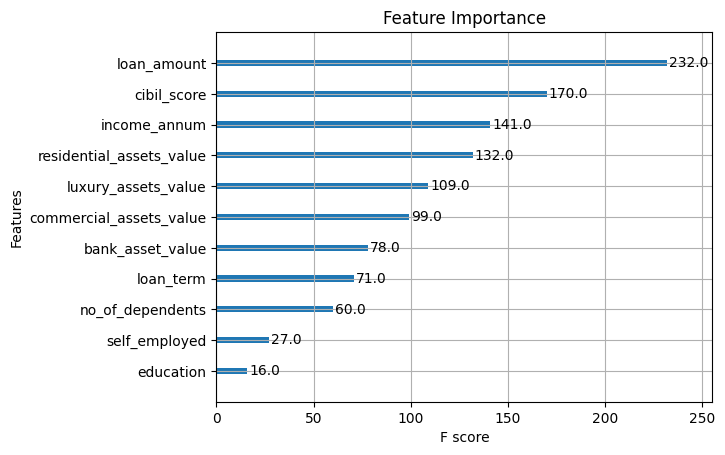

In [17]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
#Visualization using plot_importance 
plot_importance(xgb_model)
plt.title('Feature Importance')
plt.show()


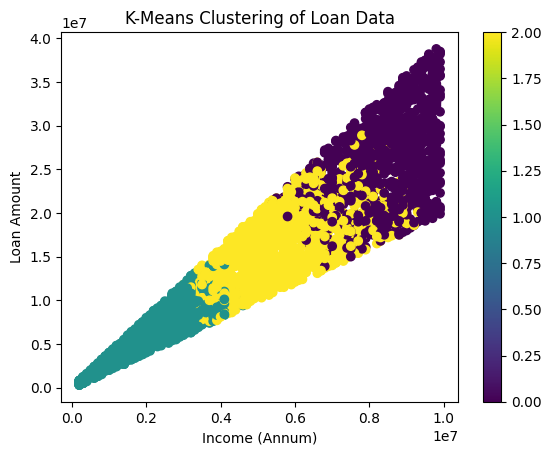

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Get predicted clusters
clusters = kmeans.predict(X_train)

# Add the cluster labels to the DataFrame for analysis
X_train['Cluster'] = clusters

# Visualize the clusters (using two features: income_annum and loan_amount)
plt.scatter(X_train['income_annum'], X_train['loan_amount'], c=clusters, cmap='viridis')
plt.xlabel('Income (Annum)')
plt.ylabel('Loan Amount')
plt.title('K-Means Clustering of Loan Data')
plt.colorbar()
plt.show()


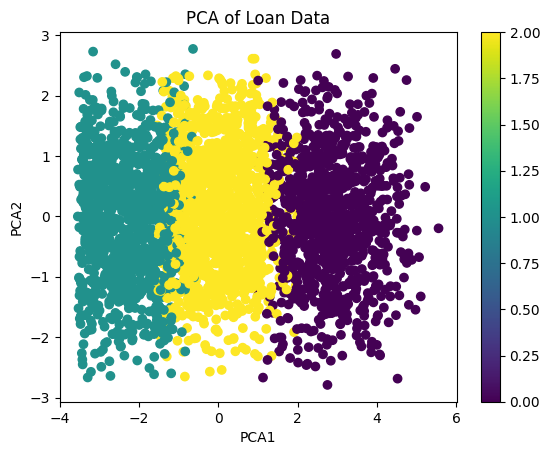

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply PCA to reduce the dimensions to 2 (for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Visualize the reduced data in 2D
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=clusters, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Loan Data')
plt.colorbar()
plt.show()
